# Digital Video

During this chapter we will learn how raw video and images are represented in a digital format.


## What is an image?

Whereas audio is continous in time, an image is continous in space.

In an analog image, there are an infinite numbers of pixels and each pixel can have an infinite numbers of values to represent its color.

In the same way we did for audio, the process to create a digital image involves 2 processes:
  * Sampling
  * Quantization

## Pixels: Spacial sampling

Spacial sampling consists in splitting an image in pixels.

With this process we are converting our signal from a continous-space to a discrete-space.

Our image can now be represented as a 2-dimensional array of pixels

<img src="res/image_2d.drawio.png" height="200">


## Effects of sampling

The effects of sampling is known as pixelation.

When the numbers of pixels used in an image decreases, the size of the area they represent is bigger, reducing the quality of the image.

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.image as mpimg
import matplotlib.colors as mpcolors
import numpy as np
from PIL import Image
%matplotlib inline

def plot_array(plt, data, w, h, show_grid=False, par=1):
    plt.imshow(data, aspect=1/par)
    plt.set_title("{}x{}".format(w, h))
    plt.xaxis.set_major_formatter(ticker.NullFormatter())
    plt.yaxis.set_major_formatter(ticker.NullFormatter())
    if show_grid:
        plt.yaxis.grid(True)
        plt.xaxis.grid(True)
        plt.xaxis.set_ticks(np.arange(1, w, 1) - 0.5)
        plt.yaxis.set_ticks(np.arange(1, h, 1) - 0.5)
    else:
        plt.axis('off')
    
def plot_img(plt, img, size, show_grid=False):
    plot_array(plt, np.asarray(img.resize((size, size))), size, size, show_grid)

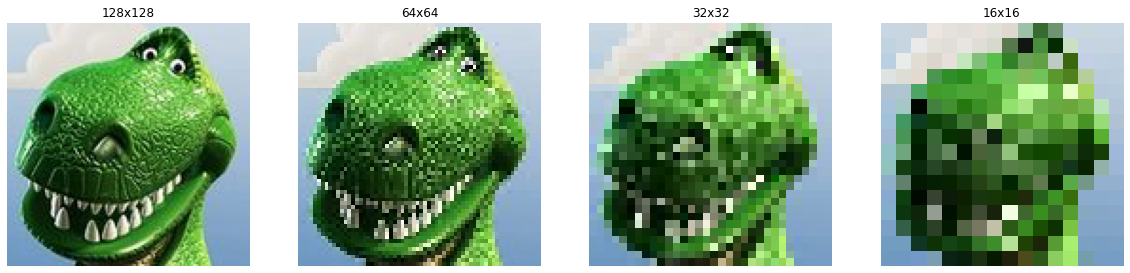

In [224]:
img = Image.open('res/trex_small.png')
f, (plt1, plt2, plt3, plt4) = plt.subplots(1, 4, figsize=(20, 20))
plot_img(plt1, img, 128); plot_img(plt2, img, 64); plot_img(plt3, img, 32); plot_img(plt4, img, 16)

## Image Resolution

The resolution of an image uses the notation WxH, where W is the width of the image, or the number of horizontal pixels, and H is the height of the image, or the number of vertical pixels

<font size="4"> Resolution = Width x Height </font>

A resolution of 1920x1080 means our image has a width of 1920 pixels and a height of 1080 pixels

It's also common to name the resolution of an image with the total number of pixels, eg: 22.1 MP (Mega Pixels) 
For example a Canon 5D Mk III produces images of 5760 pixels by 3840, which equates to 22,118,400 pixels, or 22.1 MP



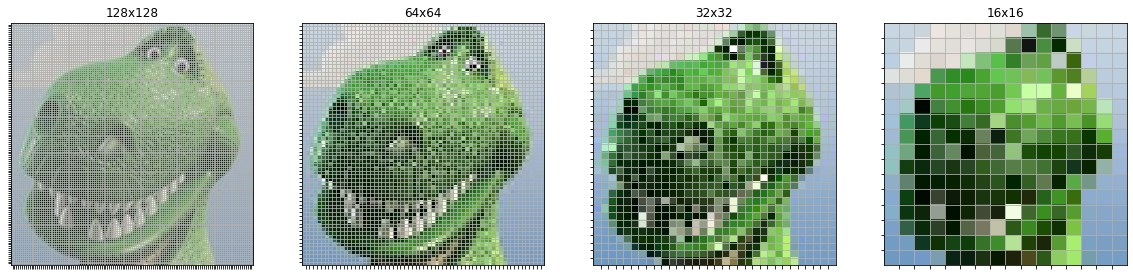

In [225]:
img = Image.open('res/trex_small.png')
f, (plt1, plt2, plt3, plt4) = plt.subplots(1, 4, figsize=(20, 20))
plot_img(plt1, img, 128, True); plot_img(plt2, img,  64, True); plot_img(plt3, img, 32, True); plot_img(plt4, img, 16, True)

## Common resolution namings

 * VGA: 640 x 480
 * PAL: 768 x 657
 * HD: 1280 x 720
 * FullHD: 1980 x 1080
 * 4K UltraHD: 3840 x 2160
 * Cinema 2K: 2028 x 1152
 * Cinema 4K: 4096 x 2160

 <img src="res/display_resolutions.png" height="400">

## Display Aspect Ratio (DAR)

The display aspect ratio is the ratio between the width and the height of an image. It is expressed with 2 numbers separated by semicolon, for example 4:3

A FullHD resolution of 1980x1080 as DAR of 16:9

1980 / 1080 = 1.7777...

16 / 9 = 1.7777...

1980 / 1080 = 16 / 9

Popular display aspect ratios are:
 * 4:3 -> Fullscreen
 * 16:9 -> Widescreen 
 * 21:9 -> Cinemascope


## Keeping the Display Aspect Ratio

When the aspect ratio of the display does not match the Display Aspect Ratio, we have several choices to display the image. These options are common in most API's.
  * Scale to fit: the image is scalled to fit the display deforming it
  * Crop to fit: the image is cropped to fit the display keeping the DAR
  * Black borders: black borders are added either vertically or horizontally to display the whole image keeping the DAR.

<!--- https://www.rtings.com/tv/learn/what-is-the-aspect-ratio-4-3-16-9-21-9 --->
<img src="res/black-bars-aspect-ratio-16-9-21-9-4-3-cinemawide.png" height="200"/>

## Pixel Aspect Ratio (PAR)

So far, we have assumed that pixels are square, but pixels can also be non-square.

The pixel aspect ratio, also known as PAR, defines the ratio between the width and the height of a single pixel.

The Storage Aspect Ratio is the ratio between the width and the height at which an image is stored, the number of vertical pixels by the number of horizontal pixels.

The Display Aspect Ratio is calculated like:

<font size="4"> SAR x PAR = DAR </font>

or 

<font size="4"> Storage Width / Storage Height x PAR = Display Width / Display Height </font>

For example, a PAL image uses a fixed size in pixels 704x576

If the image it contains has a DAR of 4:3 or 16:9, the only variable of the equation that can change is the PAR.
They will have a PAR of 12:11 and 16:11 respectively

PAR = DAR / SAR
12/11 = 4/3 / 704/576 

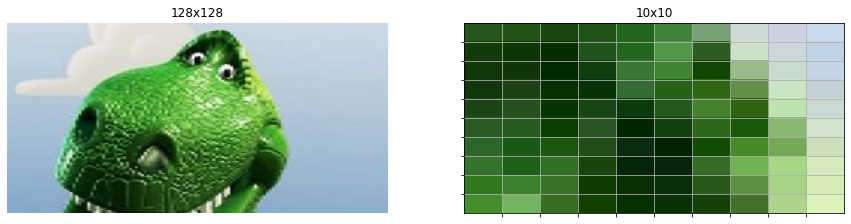

In [226]:
# The image has a resolution of 128x128 with a 2:1 PAR
# It's display size is 256x128
img = np.asarray(Image.open('res/trex_small_par.png'))
size = 10; x = 10; y = 70
img_10_10 = img[x:x+size,y:y+size]
f, (plt1, plt2) = plt.subplots(1, 2, figsize=(15, 15))
plot_array(plt1, img, 128, 128, False, 2); plot_array(plt2, img_10_10, size, size, True, 2)

## Colors: quantization

## The visible spectrum: Colors

<img src="res/em_spectrum.svg" />



## Color models

A color model describes how colors can be represented, usually as a combination of 3 color components.

A color model does not define the set of colors that are represented as a combination of these numeric values, this is defined by the colorspace.


## Additive and subtractive color models

RGB color model is mostly used in computer graphics, it has 3 components Red, Green and Blue as primary colors. It's an additive color model, mixing the 3 components with their highest intensity results in the white color

CMYK color model is used in printer, it uses 4 components using the secondary colors of the RGB color model as primary colors Cyan, Magenta, Yellow and it adds the Black one. It's a subtractive color model, ixing the 3 components with their highest intensity results in the black color


<!---- https://upload.wikimedia.org/wikipedia/commons/e/eb/Subtractive-Additive-Colour-Mixing.jpg --->

<img src="res/subtractive_additive.jpg" height="300" />

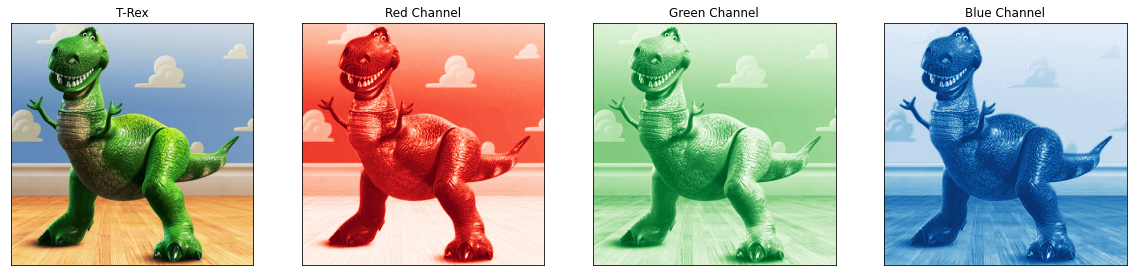

In [227]:
image = np.asarray(Image.open('res/trex.png'))

fig, plts = plt.subplots(1, 4, figsize=(20,20))

(plt1, plt2, plt3, plt4) = plts 
plt1.imshow(image); plt1.set_title("T-Rex")
plt2.imshow(image[:, :, 0], cmap=plt.cm.Reds_r); plt2.set_title("Red Channel")
plt3.imshow(image[:, :, 1], cmap=plt.cm.Greens_r); plt3.set_title("Green Channel")
plt4.imshow(image[:, :, 2], cmap=plt.cm.Blues_r); plt4.set_title("Blue Channel")

for pltx in plts:
    pltx.set_xticks(());pltx.set_yticks(())

## YUV or Y'CbCr

YUV (analog) Y'CbCr (digital) color model is mostly used for digital compression (video and images) as it allows to exploit the fact that the human eye is more sensitive to luminance than chrominance.
It uses 3 components, Y stores the luma of the image, U or Cb is the blue component relative to the green component and V or Cr is the red component relative to the green component.



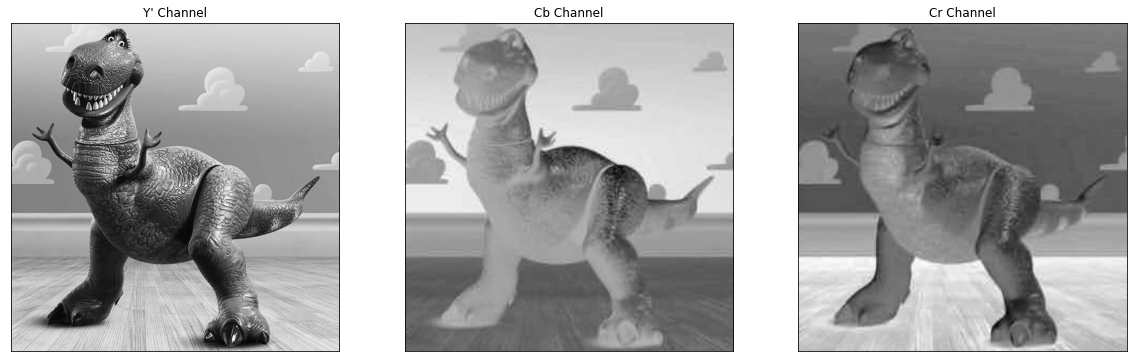

In [222]:
image = np.asarray(Image.open('res/trex.png').convert('YCbCr'))

fig, plts = plt.subplots(1, 3, figsize=(20,20))

(plt1, plt2, plt3) = plts 
plt1.imshow(image[:, :, 0], cmap='gray'); plt1.set_title("Y' Channel")
plt2.imshow(image[:, :, 1], cmap='gray'); plt2.set_title("Cb Channel")
plt3.imshow(image[:, :, 2], cmap='gray'); plt3.set_title("Cr Channel")

for pltx in plts:
    pltx.set_xticks(());pltx.set_yticks(())

## Color depth: Quantization

Color depth, also known as bit depth, is the number of bits used to represent a color. It's the quantization process for images, where we select a subset of colors to represent with a fixed number of bits.

Color depth are expressed with the total number of bits used for all the commponets in the color model.

### 1-bit Monochrome

It uses a single bit to describe the color of a pixel, it's either black or white

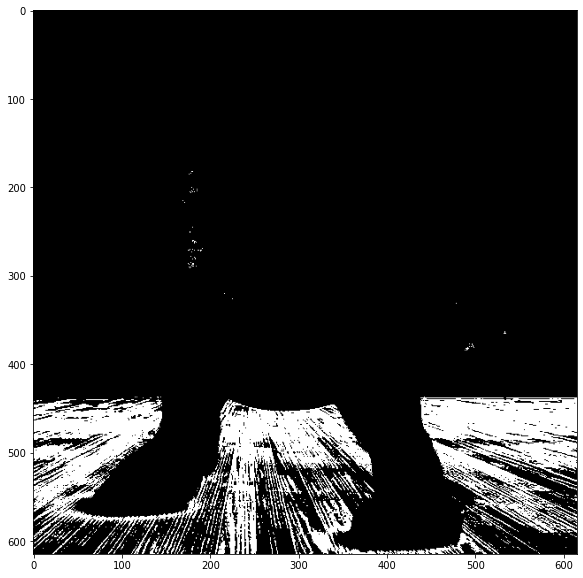

In [228]:
img = Image.open('res/trex.png').quantize(2).convert('1')
f, plt1 = plt.subplots(1, 1, figsize=(10, 10))
plt1.imshow(img, cmap='gray')

### 8-bit Grayscale

It uses 8 bits for the luma component of the image, proving a range of 255 values of greys from white to black

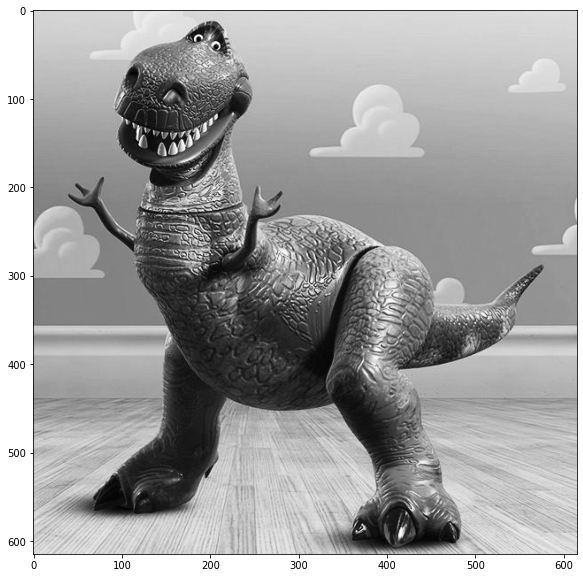

In [229]:
img = np.asarray(Image.open('res/trex.png').convert('L'))
f, plt1 = plt.subplots(1, 1, figsize=(10, 10))
plt1.imshow(img, cmap='gray')

### 8-bit Color

It uses 8 bits that are split through the different channels, 3 bits for Red 3 bits for Green and 2 bits for Blue

| r | r | r | g | g | g | b | b |


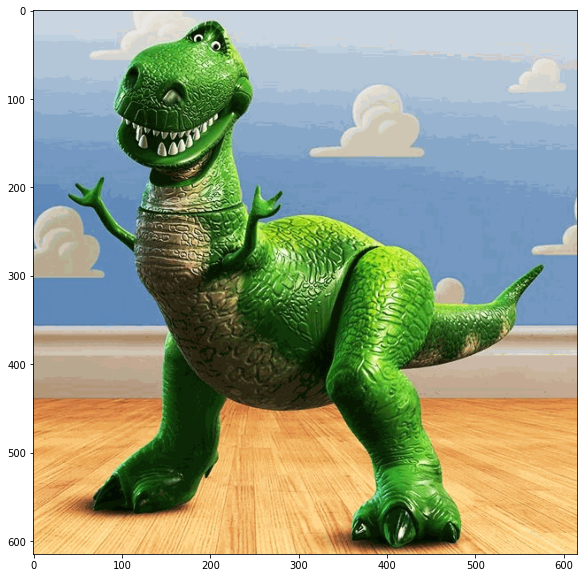

In [230]:
img = Image.open('res/trex.png').convert('P')
f, plt1 = plt.subplots(1, 1, figsize=(10, 10))
plt1.imshow(img)

### 24-bit True Color

24-bit color depth is the most common color depth, used by all computer and phone displays. It uses 32 bits per pixel, using 8 bits per channel and leaving 8 bits for the alpha channel that can used or not.

Several color models are used depending on the packing order of the color channels and the alhpa

* RGBA: | R | R | G | G | B | B | A | A |
* RGBx: | R | R | G | G | B | B | x | x |
* BGRA: | B | B | G | G | R | R | A | A |


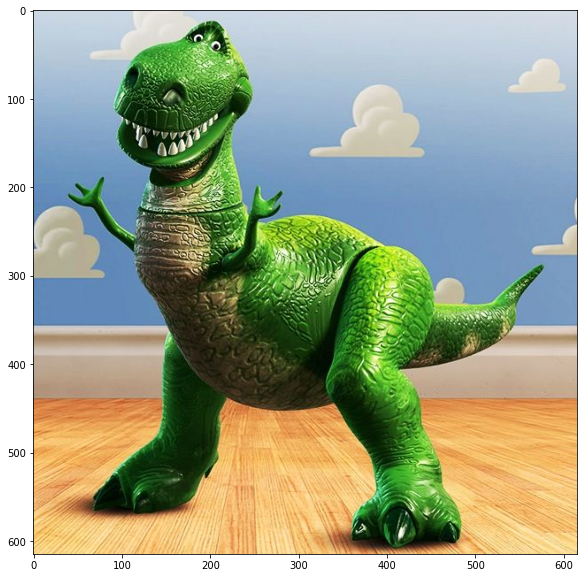

In [231]:
img = Image.open('res/trex.png')
f, plt1 = plt.subplots(1, 1, figsize=(10, 10))
plt1.imshow(img)

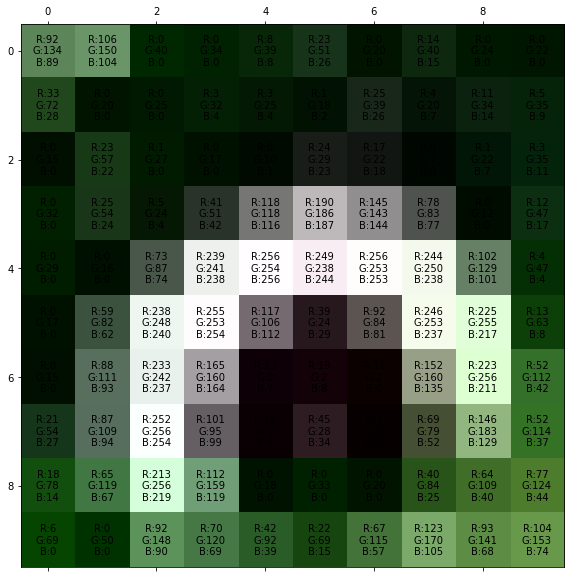

In [4]:
def to_rgb(pixel):
    return "R:{}\nG:{}\nB:{}".format(
        int(round(256 * pixel[0])), # Red
        int(round(256 * pixel[1])), # Green
        int(round(256 * pixel[2]))  # Blue
    )

img = mpimg.imread('res/trex_small.png')
size = 10; x = 10; y = 70
f, ax = plt.subplots(figsize=(10, 10))
data = img[x:x+size,y:y+size]

for i in range(size):
    for j in range(size):
        c = to_rgb (data[j,i])
        ax.text(i, j, str(c), va='center', ha='center')

ax.matshow(data)

### 30/36/48-bit Deep Color

These color depths are mostly used in digital imaging and recently in Ultra HD video using 10 bits or more per channel


## Colorspaces

A colorspace defines a set of colors that can be represented using a color model.

<!---- https://en.wikipedia.org/wiki/CIE_1931_color_space#CIE_xy_chromaticity_diagram_and_the_CIE_xyY_color_space ---->
A colorspace is represented in a CIE xy chromaticity diagram. This diagram shows the full spectrum of visible colors

The sRGB colorspace looks like this. The colors within the triangle are the ones that can be represented with this colorspace

<img src="res/srgbcolorspace.png" height=400/>

## High Dynamic Range (HDR)

High Dynamic Range in video, refers to videos haaving a higher dynamic range than Standard Dynamic Range (SDR). This is achieved with higher color depth (quantization) using at least 10 bits per color.

The following diagram shows the comparison between bt709 (HDTV) and bt2020 (UHDTV) colorspaces

<img src="res/bt2020_bt709.svg"/>

## Other colorspaces

This is a comparison of other colorspaces popular in image editing

<img src="res/cie1931xy_gamut_comparison.svg" height=400>

## Digital Video

So far we have digital images that we have converted into digital images using spacial sampling and color quantization.

Analog video is a series of images in a time-continous, we need sample in time and to convert it into a time-discrete space

<img src="res/video.drawio.png" height=400 />

## Frame rate: spacial sampling

Spacial sampling in an analog video stream is the process of taking samples of that video at a regular interval.

The frame rate expressed in Frames Per Seconds (FPS) is the frequency at which frames are sampled from a video.

A framerate of 30 FPS is used to describe a video that has 30 samples/frames each second. The equivalent in audio would be sampling at 30Hz

Movies started filming at 24 FPS and animations are considired to be fluent starting at 12fps

PAL video was recorded at 25 FPS while NTSC was recorded at 29.97 FPS

This has derived in more modern standards using 50 FPS or 59.94 FPS


## Progressive vs Interlaced

Interlaced content is an historic technical debt that has been propagated over several codec standards, including HEVC


<img src="res/interlace_zoom.gif"/>

## Video formats


Video formats are expressed using the number of lines or height of the video, if it's progressive or not and it's framerate:
 * 1080p/50 : 1080 lines, progressive, 50 FPS
 * 720i/25 : 720 height, interlaced, at 25 FPS

 <!---- https://en.wikipedia.org/wiki/1080i ---->
 
For interlaced content, sometime 1080i/50 might refer to 1080i/25 in EBU notation, where 50 is the numner of fields per seconds and not the frames per second

## Birate

Know we have all the information to calculate the bitrate, the number of bits per second, of raw video stream:

Width x Height x bpp (Bits Per Pixel) x Frames Per Second

1920 x 1080 x 32 x 25 = 1,658,880,000

It's a lot of information... it's time to compress it!